#**Question 1-Crime_data)**

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [ ]:
crime = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment 7/crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [ ]:
crime.rename(columns = {'Unnamed: 0':'city'}, inplace = True)

**Hierarchical**

In [ ]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [ ]:
# Normalized data frame (considering the numerical part of data)
crime_norm = norm_func(crime.iloc[:,1:])

crime_norm.iloc[:,:]

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


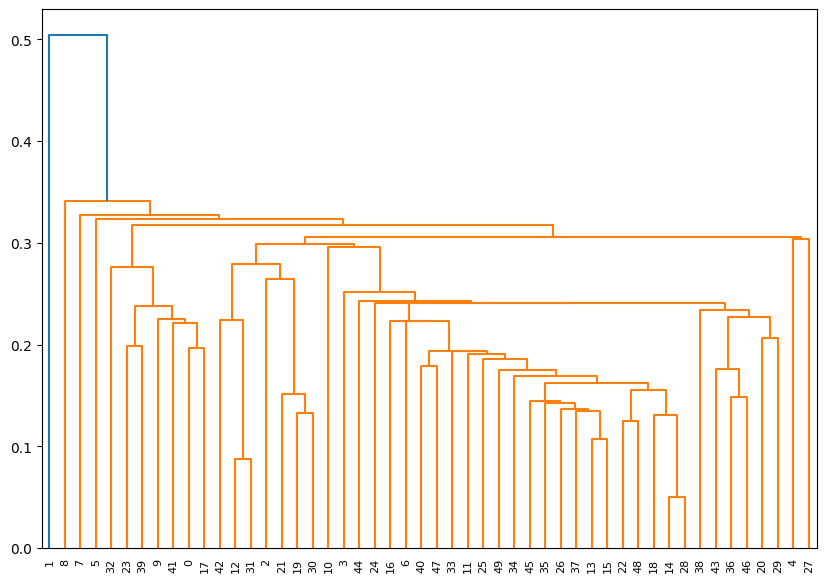

In [ ]:
#create dendrogram
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method='single'))

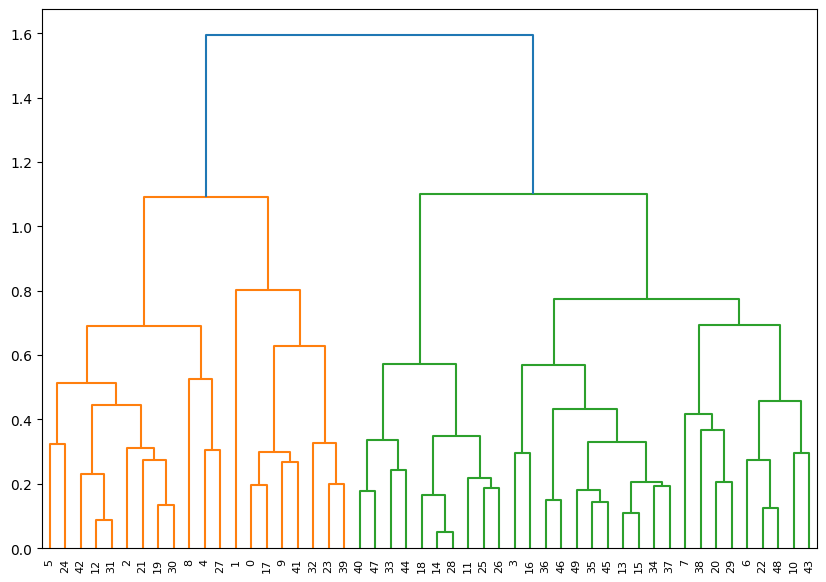

In [ ]:
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method='complete'))

In [ ]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage ='complete')

In [ ]:
hc.fit_predict(crime_norm)

array([3, 4, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0])

In [ ]:
# save clusters for chart
y_hc = hc.fit_predict(crime_norm)
#Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [ ]:
crime['h_clusterid'] = y_hc
crime

,city,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [ ]:
crime2=crime.sort_values("h_clusterid")
crime2.iloc[:,[0,-1]]

,city,h_clusterid
49,Wyoming,0
20,Massachusetts,0
29,New Jersey,0
16,Kentucky,0
15,Kansas,0
34,Ohio,0
13,Indiana,0
35,Oklahoma,0
22,Minnesota,0
10,Hawaii,0


**K-Means Clustering**

In [ ]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [ ]:
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(crime_norm)
    TWSS.append(kmeans.inertia_)

Text(0, 0.5, 'total_within_SS')

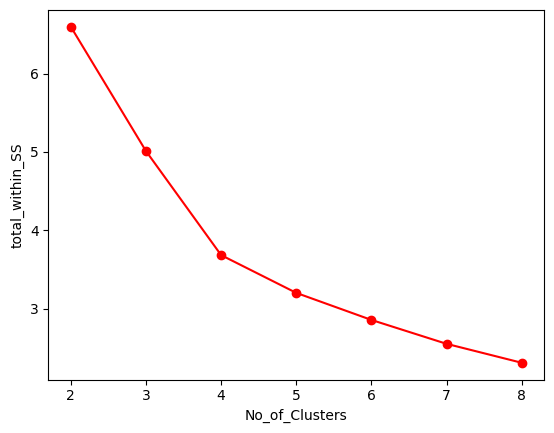

In [ ]:
TWSS
# Scree plot
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [ ]:
# Selecting 4 clusters from the above scree plot which is the optimum number ofclusters
model_kmeans = KMeans(n_clusters = 4)
model_kmeans.fit(crime_norm)

KMeans(n_clusters=4)

In [ ]:
model_kmeans.labels_

array([3, 0, 0, 3, 0, 0, 1, 1, 0, 3, 1, 2, 0, 1, 2, 1, 2, 3, 2, 0, 1, 0,
       2, 3, 1, 2, 2, 0, 2, 1, 0, 0, 3, 2, 1, 1, 1, 1, 1, 3, 2, 3, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int32)

In [ ]:
model_kmeans.labels_ # getting the labels of clusters assigned to each row
mb = pd.Series(model_kmeans.labels_) # converting numpy array into pandas series object
crime['k_means_clust'] = mb # creating a new column and assigning it to newcolumn

In [ ]:
crime.head()

,city,Murder,Assault,UrbanPop,Rape,h_clusterid,k_means_clust
0,Alabama,13.2,236,58,21.2,3,3
1,Alaska,10.0,263,48,44.5,4,0
2,Arizona,8.1,294,80,31.0,1,0
3,Arkansas,8.8,190,50,19.5,0,3
4,California,9.0,276,91,40.6,1,0


In [ ]:
kmeans = KMeans(n_clusters=3,random_state=0)
predict=kmeans.fit_predict(crime_norm)
predict

array([0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2,
       1, 2, 2, 1, 1, 2], dtype=int32)

In [ ]:
crime2=crime.sort_values("k_means_clust")
crime2.iloc[:,[0,-1]]

,city,k_means_clust
21,Michigan,0
1,Alaska,0
2,Arizona,0
19,Maryland,0
4,California,0
5,Colorado,0
30,New Mexico,0
8,Florida,0
42,Texas,0
27,Nevada,0


**DB SCAN**

In [ ]:
array=crime.iloc[:,1:].values
array

array([[ 13.2, 236. ,  58. ,  21.2,   3. ,   3. ],
       [ 10. , 263. ,  48. ,  44.5,   4. ,   0. ],
       [  8.1, 294. ,  80. ,  31. ,   1. ,   0. ],
       [  8.8, 190. ,  50. ,  19.5,   0. ,   3. ],
       [  9. , 276. ,  91. ,  40.6,   1. ,   0. ],
       [  7.9, 204. ,  78. ,  38.7,   1. ,   0. ],
       [  3.3, 110. ,  77. ,  11.1,   0. ,   1. ],
       [  5.9, 238. ,  72. ,  15.8,   0. ,   1. ],
       [ 15.4, 335. ,  80. ,  31.9,   1. ,   0. ],
       [ 17.4, 211. ,  60. ,  25.8,   3. ,   3. ],
       [  5.3,  46. ,  83. ,  20.2,   0. ,   1. ],
       [  2.6, 120. ,  54. ,  14.2,   2. ,   2. ],
       [ 10.4, 249. ,  83. ,  24. ,   1. ,   0. ],
       [  7.2, 113. ,  65. ,  21. ,   0. ,   1. ],
       [  2.2,  56. ,  57. ,  11.3,   2. ,   2. ],
       [  6. , 115. ,  66. ,  18. ,   0. ,   1. ],
       [  9.7, 109. ,  52. ,  16.3,   0. ,   2. ],
       [ 15.4, 249. ,  66. ,  22.2,   3. ,   3. ],
       [  2.1,  83. ,  51. ,   7.8,   2. ,   2. ],
       [ 11.3, 300. ,  67. ,  2

In [ ]:
stscaler = StandardScaler()
X = stscaler.fit_transform((crime.iloc[:,1:]))
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  1.61867696,
         1.64011123],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  2.4889334 ,
        -1.32394521],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -0.1218359 ,
        -1.32394521],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -0.99209233,
         1.64011123],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -0.1218359 ,
        -1.32394521],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -0.1218359 ,
        -1.32394521],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.99209233,
        -0.3359264 ],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -0.99209233,
        -0.3359264 ],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -0.1218359 ,
        -1.32394521],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  1.61867696,
         1.64011123],
       [-0.57702994, -1.51224105,  1.21848371, -0.

In [ ]:
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan.fit_predict(X)

array([ 0, -1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
DB=pd.DataFrame(dbscan.labels_,columns=['DB SCAN'])
DB

,DB SCAN
0,0
1,-1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,0


In [ ]:
clustered = pd.concat([crime,DB],axis=1)
clustered

,city,Murder,Assault,UrbanPop,Rape,h_clusterid,k_means_clust,DB SCAN
0,Alabama,13.2,236,58,21.2,3,3,0
1,Alaska,10.0,263,48,44.5,4,0,-1
2,Arizona,8.1,294,80,31.0,1,0,1
3,Arkansas,8.8,190,50,19.5,0,3,1
4,California,9.0,276,91,40.6,1,0,1
5,Colorado,7.9,204,78,38.7,1,0,1
6,Connecticut,3.3,110,77,11.1,0,1,1
7,Delaware,5.9,238,72,15.8,0,1,1
8,Florida,15.4,335,80,31.9,1,0,1
9,Georgia,17.4,211,60,25.8,3,3,0


In [ ]:
clustered[clustered['DB SCAN']==-1]

,city,Murder,Assault,UrbanPop,Rape,h_clusterid,k_means_clust,DB SCAN
1,Alaska,10.0,263,48,44.5,4,0,-1


**Inferences**

1)“Clust - 0” has low crime rate. 2) “Clust - 1” has high crime rate. Out of 50 total locations, 20 have higher crime rates.

#**Question 2- Airlines**

In [42]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [48]:
air=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignment 7/EastWestAirlines.csv")
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


**EDA**

In [49]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [50]:
air.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


**Renaming the columns**

In [51]:
air=air.rename({'ID#':'ID','Award?':'Award'},axis=1)

In [52]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [53]:
# Normalized data frame (considering the numerical part of data)
air1_norm = norm_func(air)
air1_norm

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


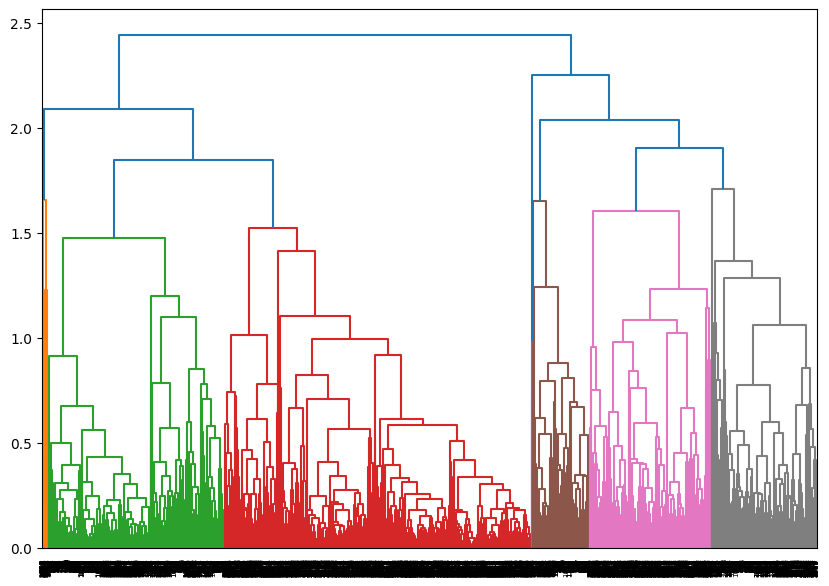

In [54]:
#create dendrogram
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(air1_norm, method='complete'))

In [55]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [56]:
y=pd.DataFrame(hclusters.fit_predict(air1_norm),columns=['clustersid'])
y['clustersid'].value_counts()

0    912
4    884
2    838
1    796
3    569
Name: clustersid, dtype: int64

In [57]:
 # Adding clusters to dataset
air['hclusters']=hclusters.labels_
air

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,hclusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


**Plotting barplot using groupby method to get visualization of how many row no in each cluster**

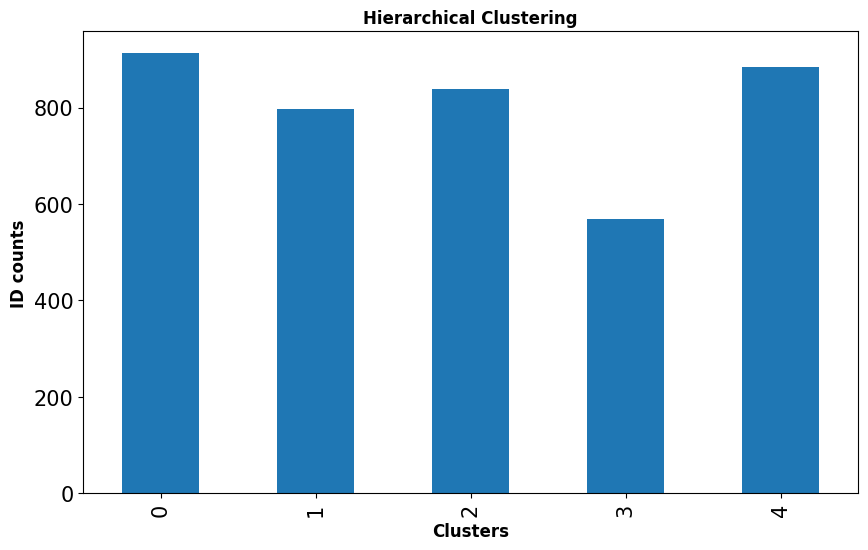

In [58]:
fig, ax = plt.subplots(figsize=(10, 6))
air.groupby(['hclusters']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [59]:
air.groupby('hclusters').agg(['mean']).reset_index()

,hclusters,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1647.451754,103377.721491,221.676535,3.691886,1.001096,1.023026,41796.067982,19.587719,674.711623,2.025219,4796.646930,1.0
1,1,1879.143216,106682.484925,72.143216,3.227387,1.001256,1.026382,26773.806533,16.486181,196.809045,0.551508,4363.711055,0.0
2,2,3328.994033,31061.826969,108.257757,1.000000,1.000000,1.000000,2479.093079,5.661098,277.115752,0.769690,1784.566826,0.0
3,3,1902.894552,86915.794376,269.880492,1.010545,1.038664,1.010545,8244.121265,9.683656,1150.478032,3.520211,4350.043937,1.0
4,4,1342.245475,44849.627828,81.942308,1.003394,1.038462,1.001131,2674.084842,5.831448,204.661765,0.632353,5261.788462,0.0


In [60]:
# silhouette_score of AgglomerativeClustering
from sklearn.metrics import silhouette_score
sil_score= silhouette_score(air1_norm, hclusters.labels_)
sil_score

0.3712758705361222

**K-Means Clustering**

In [61]:
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(air1_norm)
    TWSS.append(kmeans.inertia_)

Text(0, 0.5, 'total_within_SS')

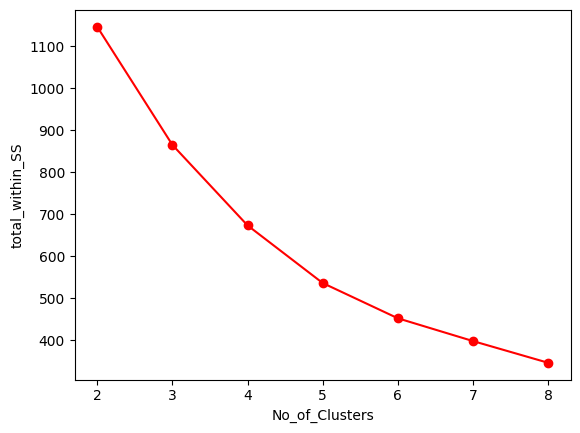

In [62]:
# Scree plot
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [63]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters
model_kmeans = KMeans(n_clusters = 5)
model_kmeans.fit(air1_norm)

KMeans(n_clusters=5)

In [64]:
model_kmeans.labels_

array([1, 1, 1, ..., 0, 4, 4], dtype=int32)

In [65]:
model_kmeans.labels_ # getting the labels of clusters assigned to each row
mb = pd.Series(model_kmeans.labels_) # converting numpy array into pandas series object
air['k_means_clust'] = mb # creating a new column and assigning it to new column

In [66]:
air.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,hclusters,k_means_clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,2


In [67]:
sil_score= silhouette_score(air1_norm, model_kmeans.labels_)
print('Silhouette Score for data normalized by MinMaxScaler: ',sil_score)

Silhouette Score for data normalized by MinMaxScaler:  0.4166386993706997


In [68]:
air.groupby('k_means_clust').agg(['mean']).reset_index()

,k_means_clust,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,hclusters
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2063.952020,78078.890152,274.411616,1.433081,1.027778,1.007576,10703.342172,11.363636,924.084596,2.804293,4072.556818,1.0,2.155303
1,1,1169.978009,49674.980324,90.319444,1.118056,1.017361,1.001157,3386.160880,6.824074,242.075231,0.719907,5570.855324,0.0,3.646991
2,2,1379.641509,118863.698113,200.866473,4.074020,1.001451,1.030479,49828.551524,20.862119,780.963716,2.364296,5260.162554,1.0,0.000000
3,3,1628.158379,125899.655617,68.941068,3.664825,1.001842,1.025783,33035.488029,17.337017,225.740331,0.655617,4793.812155,0.0,1.000000
4,4,3219.702070,35385.638164,94.610261,1.204320,1.017102,1.006301,4400.907291,6.941494,214.288029,0.598560,1983.927093,0.0,2.082808


**DBSCAN**

In [69]:
# Using data normalized by MinMaxScaler
dbscan = DBSCAN(eps=0.6, min_samples=12)
dbscan.fit(air1_norm)

DBSCAN(eps=0.6, min_samples=12)

In [70]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [71]:
# silhouette score
sil_score= silhouette_score(air1_norm, dbscan.labels_)
sil_score

0.4682009843113833

In [72]:
DB=pd.DataFrame(dbscan.labels_,columns=['DB_SCAN'])
DB

,DB_SCAN
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [73]:
clustered = pd.concat([air,DB],axis=1)
clustered

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,hclusters,k_means_clust,DB_SCAN
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3,0,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3,0,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,4,0


In [74]:
clustered[clustered['DB_SCAN']==-1]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,hclusters,k_means_clust,DB_SCAN
275,279,1704838,0,1,1,1,17108,32,4823,23,7283,1,3,0,-1
384,389,28193,0,5,1,4,103456,32,0,0,6980,1,0,2,-1
850,861,25629,0,4,1,5,107308,36,600,2,5966,1,0,2,-1
904,915,15835,0,2,1,5,112171,16,0,0,5825,1,3,0,-1
2015,2032,53232,888,4,1,1,80696,65,22100,45,3831,1,0,2,-1
2166,2183,100634,0,1,3,1,69669,28,1540,12,4193,1,3,0,-1
2364,2382,108081,0,5,1,5,217006,24,0,0,3567,1,0,2,-1
2840,2862,8557,0,1,1,1,200622,5,622,3,1955,1,3,0,-1
2955,2977,61474,0,1,1,4,47717,14,0,0,3354,0,1,4,-1
2999,3021,142527,1000,1,3,1,24091,47,4650,24,3206,1,3,0,-1
